<a href="https://colab.research.google.com/github/davidsbecerragu-hash/base-de-datos/blob/main/Red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archivo cargado correctamente.
Total de nodos encontrados: 39


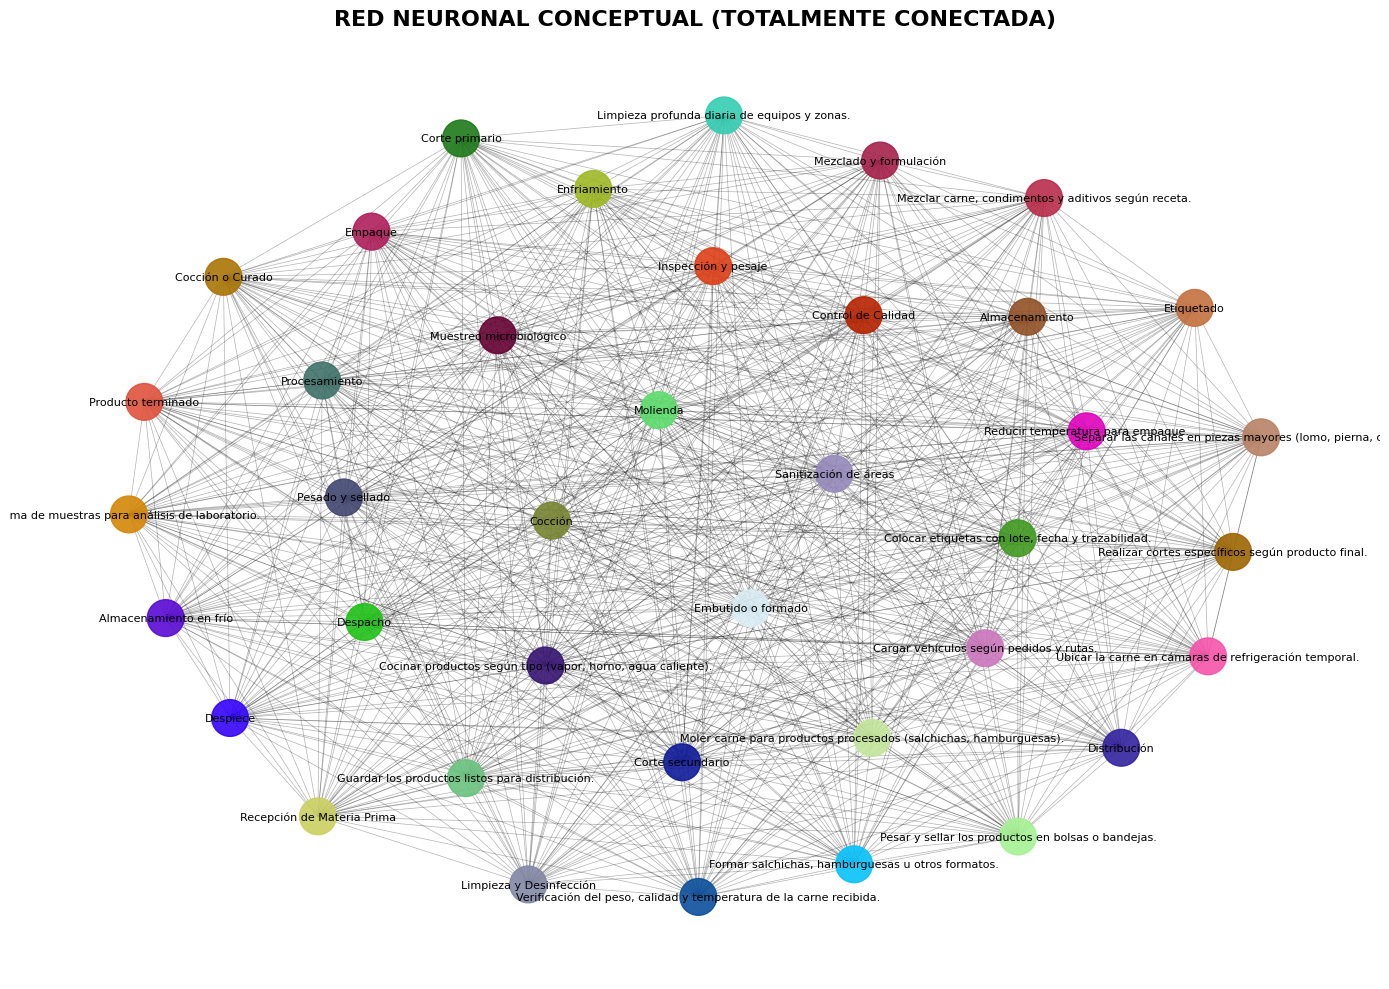

In [10]:
# ================================================================
# RED NEURONAL CONCEPTUAL (TOTALMENTE CONECTADA)
# ================================================================

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import os

# Ruta del archivo Excel (ajusta si es necesario)
ruta_archivo = "/content/Base_de_datos_produccion_carnicos.xlsx"

# ----------------------------------------------------------------
# 1. CARGAR EL ARCHIVO EXCEL
# ----------------------------------------------------------------
try:
    df = pd.read_excel(ruta_archivo)
    print("Archivo cargado correctamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    raise

# ----------------------------------------------------------------
# 2. EXTRAER LAS COLUMNAS RELEVANTES DE FORMA ROBUSTA
# ----------------------------------------------------------------
columnas_objetivo = ["Proceso Principal", "Subproceso", "Descripción"]

# Filtramos solo las columnas que existen en el archivo
columnas_presentes = [col for col in columnas_objetivo if col in df.columns]

if not columnas_presentes:
    raise ValueError("No se encontraron las columnas esperadas en el archivo Excel.")

# Combinamos todos los valores en una sola lista de nodos únicos
nodos = []
for col in columnas_presentes:
    nodos.extend(df[col].dropna().astype(str).tolist())

# Eliminamos duplicados
nodos = list(set(nodos))

print(f"Total de nodos encontrados: {len(nodos)}")

# ----------------------------------------------------------------
# 3. CREAR EL GRAFO TOTALMENTE CONECTADO
# ----------------------------------------------------------------
G = nx.complete_graph(nodos)

# ----------------------------------------------------------------
# 4. ASIGNAR COLORES ALEATORIOS A LOS NODOS
# ----------------------------------------------------------------
colores = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(len(nodos))]
color_dict = {nodo: color for nodo, color in zip(nodos, colores)}

# ----------------------------------------------------------------
# 5. DIBUJAR LA RED CON MATPLOTLIB
# ----------------------------------------------------------------
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42, k=0.8)  # Diseño de red (puedes ajustar k)

nx.draw_networkx_nodes(G, pos, node_color=list(color_dict.values()), node_size=700, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

plt.title("RED NEURONAL CONCEPTUAL (TOTALMENTE CONECTADA)", fontsize=16, fontweight='bold')
plt.axis("off")
plt.tight_layout()
plt.show()